## 07 数据归一化处理

### 一、为什么使用归一化

肿瘤大小和发现时间，单位不一样，他们的距离会被『发现时间』所主导，所以我们需要同一单位。
![IMAGE](https://ws4.sinaimg.cn/large/006tKfTcly1fs6e46tf0tj30ro0eq0uw.jpg)

如果时间换成年，数据又会被肿瘤大小所主宰
![IMAGE](https://farm2.staticflickr.com/1748/42662935872_5edbaf2917_o.png)

### 二、解决方案 
#### 方案1 ： 最值归一化 Normlization
![IMAGE](https://farm2.staticflickr.com/1722/42662943982_a983cf66ac_o.png)

**适用范围：**
* 适用于分布有明显边界的情况：比如学生的成绩，像素点
* 受 outlier 的影响很大：比如收入，如果有一个亿万富翁，会把其他人的数据缩小很多倍。


#### 方案二：均值方差归一化 Standarization
![IMAGE](https://farm2.staticflickr.com/1746/42663001552_c6c4c1f8df_o.png)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### 三、归一化实现
####  1 最值归一化 Normalization

In [3]:
x = np.random.randint(0, 100, 100) 

**| 对向量进行处理**

In [4]:
x

array([79, 12, 63, 90, 92,  3,  8, 54, 27, 12, 99, 89, 58, 70,  8, 40, 36,
       80,  7, 82, 22, 31, 28, 55,  9, 79, 10, 30, 70, 29, 93, 50, 79, 30,
       69,  8, 23, 39, 57, 84, 15, 85, 94, 12,  7, 61, 49, 59,  7,  1, 73,
       91, 16,  2, 63, 63, 18,  8, 20, 76, 24, 96, 61, 55, 45,  3,  0, 18,
       44,  7, 99,  5, 13, 10, 64,  6, 18, 23, 60, 22, 29,  5, 66, 98, 74,
       46, 20,  6, 42, 42, 45, 21,  2,  0, 69, 17, 57, 73,  9, 43])

In [5]:
(x - np.min(x)) / (np.max(x) - np.min(x))

array([ 0.7979798 ,  0.12121212,  0.63636364,  0.90909091,  0.92929293,
        0.03030303,  0.08080808,  0.54545455,  0.27272727,  0.12121212,
        1.        ,  0.8989899 ,  0.58585859,  0.70707071,  0.08080808,
        0.4040404 ,  0.36363636,  0.80808081,  0.07070707,  0.82828283,
        0.22222222,  0.31313131,  0.28282828,  0.55555556,  0.09090909,
        0.7979798 ,  0.1010101 ,  0.3030303 ,  0.70707071,  0.29292929,
        0.93939394,  0.50505051,  0.7979798 ,  0.3030303 ,  0.6969697 ,
        0.08080808,  0.23232323,  0.39393939,  0.57575758,  0.84848485,
        0.15151515,  0.85858586,  0.94949495,  0.12121212,  0.07070707,
        0.61616162,  0.49494949,  0.5959596 ,  0.07070707,  0.01010101,
        0.73737374,  0.91919192,  0.16161616,  0.02020202,  0.63636364,
        0.63636364,  0.18181818,  0.08080808,  0.2020202 ,  0.76767677,
        0.24242424,  0.96969697,  0.61616162,  0.55555556,  0.45454545,
        0.03030303,  0.        ,  0.18181818,  0.44444444,  0.07

**| 对矩阵进行处理**

In [6]:
X = np.random.randint(0, 100, (50, 2))

因为 Normalization 之后会有小数出现，所以我们要转化类型

In [7]:
X = np.array(X, dtype=float)

In [8]:
X[:10,:]

array([[ 54.,  68.],
       [ 69.,  96.],
       [  0.,  81.],
       [ 57.,  29.],
       [  9.,  44.],
       [  9.,  59.],
       [ 57.,  86.],
       [ 37.,   2.],
       [ 50.,  89.],
       [ 38.,  48.]])

#### 取每一列feature 的最大值和最小值

In [9]:
X[:,0] = (X[:,0] - np.min(X[:,0])) / (np.max(X[:,0]) - np.min(X[:,0]))
X[:,1] = (X[:,1] - np.min(X[:,1])) / (np.max(X[:,1]) - np.min(X[:,1]))

In [10]:
X[:10,:]

array([[ 0.55102041,  0.70212766],
       [ 0.70408163,  1.        ],
       [ 0.        ,  0.84042553],
       [ 0.58163265,  0.28723404],
       [ 0.09183673,  0.44680851],
       [ 0.09183673,  0.60638298],
       [ 0.58163265,  0.89361702],
       [ 0.37755102,  0.        ],
       [ 0.51020408,  0.92553191],
       [ 0.3877551 ,  0.4893617 ]])

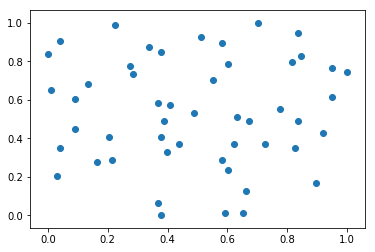

In [11]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [12]:
np.mean(X[:,0])

0.48959183673469381

In [13]:
np.std(X[:,0])

0.28488575203366484

In [14]:
np.mean(X[:,1])

0.53276595744680844

In [15]:
np.std(X[:,1])

0.2759635984156617

#### 2 均值方差归一化 Standardization

In [16]:
X2 = np.random.randint(0, 100, (50, 2))

In [17]:
X2 = np.array(X2, dtype=float)

In [18]:
X2[:10,:]

array([[ 57.,   4.],
       [ 44.,   3.],
       [ 20.,  21.],
       [  1.,  63.],
       [  1.,  81.],
       [ 95.,  18.],
       [ 64.,  10.],
       [ 59.,  75.],
       [ 68.,  59.],
       [ 64.,  13.]])

In [19]:
X2[:,0] = (X2[:,0] - np.mean(X2[:,0])) / np.std(X2[:,0])
X2[:,1] = (X2[:,1] - np.mean(X2[:,1])) / np.std(X2[:,1])

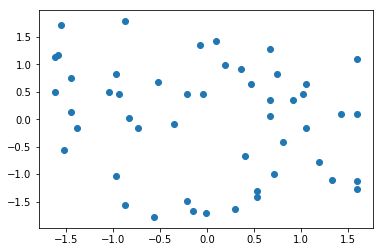

In [20]:
plt.scatter(X2[:,0], X2[:,1])
plt.show()

注意这个图横纵总表的范围并不是[-1,1]

In [21]:
np.mean(X2[:,0])

-2.5535129566378602e-17

In [22]:
np.std(X2[:,0])

1.0

In [23]:
np.mean(X2[:,1])

-4.4408920985006264e-17

In [24]:
np.std(X2[:,1])

1.0

我们可以看出，平均值都是0左右，标准差为1左右，大部分数据在2个标准差之内。